<a href="https://colab.research.google.com/github/40423105/ML/blob/main/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Parameters.
learning_rate = 0.1
training_steps = 1000
display_step = 100
n_samples = 50

x = np.random.rand(n_samples).astype(np.float32)
y = x * 10 + 5
w = tf.Variable(tf.random.normal([1]))
b = tf.Variable(tf.zeros([1]))

In [11]:
def linear_regression(x):
  return w * x + b

def mean_square(y_pred, y_true):
  return tf.reduce_sum(tf.pow(y_pred - y_true, 2)) / (2 * n_samples)

optimizer = tf.optimizers.SGD(learning_rate)

In [12]:
def run_optimization():
  with tf.GradientTape() as g:
    pred = linear_regression(x)
    loss = mean_square(pred , y)

  gradients = g.gradient(loss, [w, b])
  optimizer.apply_gradients(zip(gradients, [w,b]))

In [13]:
for step in range(1, training_steps + 1):
  run_optimization()

  if step % display_step == 0:
    pred = linear_regression(x)
    loss = mean_square(pred, y)
    print("step: %i, loss: %f, W: %f, b:%f" % (step, loss, w.numpy(), b.numpy()))

step: 100, loss: 0.419537, W: 6.478395, b:6.729780
step: 200, loss: 0.140615, W: 7.961216, b:6.001443
step: 300, loss: 0.047130, W: 8.819674, b:5.579771
step: 400, loss: 0.015796, W: 9.316666, b:5.335651
step: 500, loss: 0.005294, W: 9.604392, b:5.194321
step: 600, loss: 0.001775, W: 9.770967, b:5.112501
step: 700, loss: 0.000595, W: 9.867405, b:5.065130
step: 800, loss: 0.000199, W: 9.923233, b:5.037707
step: 900, loss: 0.000067, W: 9.955556, b:5.021831
step: 1000, loss: 0.000022, W: 9.974269, b:5.012640


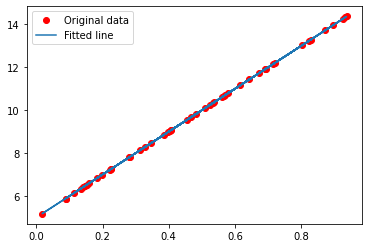

In [16]:
plt.plot(x, y, 'ro', label = 'Original data')
plt.plot(x, np.array(w * x + b), label = 'Fitted line')
plt.legend()
plt.show()